In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.dummy import DummyClassifier

In [8]:
df = pd.read_csv('/Users/sammarcustaylor/Desktop/titanic_clean.csv')

In [9]:
for column in df:
    unique_vals = np.unique(df[column])
    num_values = len(unique_vals)
    if num_values < 10:
         print("The number of values for feature {} : {} --> {}".format(column, num_values, unique_vals))
    else:
        print("The number of values for feature {} : {}".format(column, num_values, unique_vals))

The number of values for feature Survived : 2 --> [0 1]
The number of values for feature Pclass : 3 --> [1 2 3]
The number of values for feature Sex : 2 --> [0 1]
The number of values for feature Age : 89
The number of values for feature Fare : 248
The number of values for feature Family_count : 9 --> [ 0  1  2  3  4  5  6  7 10]
The number of values for feature cabin_ind : 2 --> [0 1]


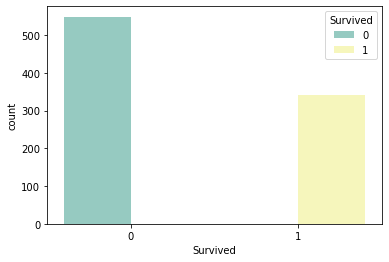

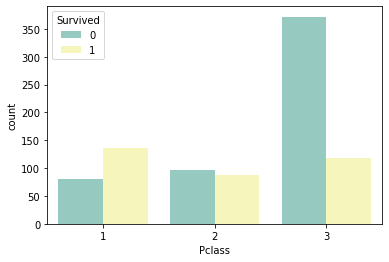

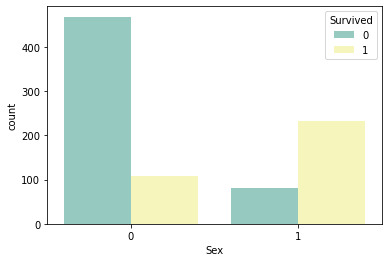

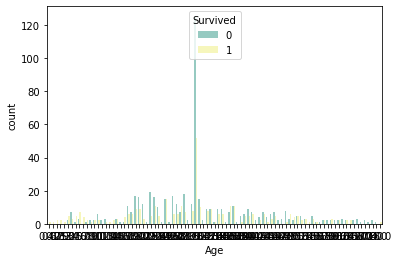

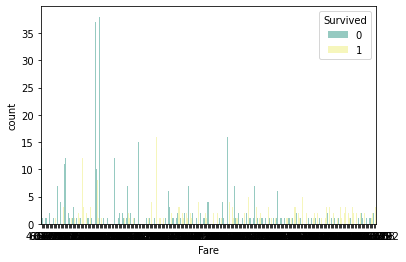

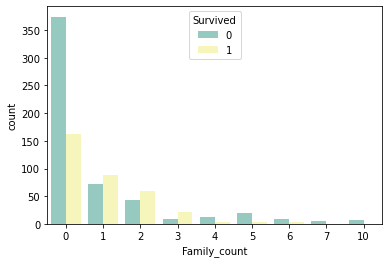

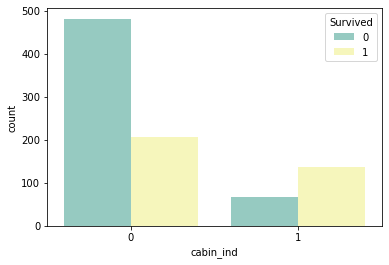

In [20]:
features = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Family_count', 'cabin_ind']

for f in features:
    sns.countplot(x = f, data = df, palette = 'Set3', hue = 'Survived')
    plt.show()

# Feature Selection 
+ In a high dimensional ML case we may want to filter variables to save time. We do not have many variables so we will use all of the data

In [25]:
X  = df.drop('Survived', axis = 1).values
y = df['Survived']

print(X.shape)
print(y.shape)

(891, 6)
(891,)


In [37]:
dt = DecisionTreeClassifier(random_state = 15, criterion = 'entropy', max_depth = 10)
dt = dt.fit(X,y)

In [43]:
fi_columns = []
fi_nums = []


for i, column in enumerate(df.drop('Survived', axis = 1)):
    print('The feature importance for {} is {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi_columns.append(column)
    fi_nums.append(dt.feature_importances_[i])

The feature importance for Pclass is 0.121
The feature importance for Sex is 0.337
The feature importance for Age is 0.200
The feature importance for Fare is 0.222
The feature importance for Family_count is 0.066
The feature importance for cabin_ind is 0.053


In [61]:
fi_df = zip(fi_columns, fi_nums)
fi_df = pd.DataFrame(fi_df, columns = ['Names', 'Feature_Importance'])
fi_df.sort_values('Feature_Importance', ascending = False)

# Sex has the most information gain, folowed by fare and age. After there is a big drop off. 
# If there were more columns we could exclude features with 0 importance. 

,Names,Feature_Importance
1,Sex,0.337337
3,Fare,0.221591
2,Age,0.200069
0,Pclass,0.121457
4,Family_count,0.066410
5,cabin_ind,0.053136


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [106]:
lr = LogisticRegression(random_state = 10)

lr.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [117]:
# predict
y_pred = lr.predict(X_train)

# predict probability of class survival or no survival. 
pred_proba = lr.predict_proba(X_train)

# feature coefficients
lr.coef_

array([[-0.72632636,  2.60075878, -0.03461355,  0.00371614, -0.22921715,
         0.6161983 ]])

# Evaluation

In [120]:
# Traning accuracy

print("The training accuracy is: ", lr.score(X_train, y_train))

# Test accuracy 

print("The training accuracy is: ", lr.score(X_test, y_test))

The training accuracy is:  0.7979041916167665
The training accuracy is:  0.8161434977578476


In [139]:
# Classification report 

print(classification_report(y_train, y_pred))

# Precision -  out of all positive predicted, what percentage is truly positive. 

# Recall - out of the total positive what percentage are correctly predicted positive (true positive rate)

# f1-score - the weighted average of precision and recall. 

# The largest difference between the two is recall. The alogrithm is better at predicted deaths than it is survival. 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       415
           1       0.74      0.71      0.73       253

    accuracy                           0.80       668
   macro avg       0.79      0.78      0.78       668
weighted avg       0.80      0.80      0.80       668



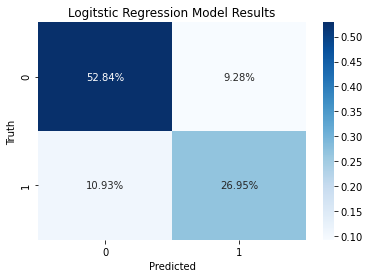

<Figure size 720x720 with 0 Axes>

In [136]:
# Confusion Matrix

cm = confusion_matrix(y_train, y_pred)

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues');

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Logitstic Regression Model Results');

plt.figure(figsize = (10, 10));

# Log Loss / Logarithmic Loss / Cross-Entropy Loss

In [ ]:
# Loss function of logistic regression and extensions of it such as neural networks, defined as the negative log 
# likelihood of the the true labels given a probalistic classsifiers predictors.

# Why its important? For example, imagine having 2 models/ classifiers that both predict one observation correctly
# (Survived) However, 1 classifier has a predicted probability of 0.54, and the other 0.95
# Due to the threshold of .50 the classifier narrowly predicts survival succesfully. 
# In this scenario classification accuracy is 100% rendering useless. 

# We want to select the model that has the lowest log loss


In [161]:
print("The log loss of training set is ", log_loss(y_train, pred_proba))


pred_proba_t = lr.predict_proba(X_test)

print("\nThe log loss of test set is ", log_loss(y_test, pred_proba_t))

The log loss of training set is  0.44810034369805596

The log loss of test set is  0.4207571987083773


# Different forms of Hyper Parameter Tuning 

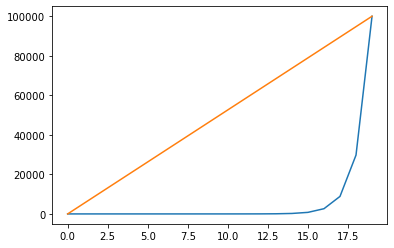

In [164]:
# create a range for C values 
np.geomspace(1e-5, 1e5, num = 20)

plt.plot(np.geomspace(1e-5, 1e5, num = 20)) # Uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num = 20));

# blue label is log space
# orange label is linear speace
# both uniformly distributed 
# log space helps to move to global minima faster. 

In [190]:
C_list = np.geomspace(1e-5, 1e5, num = 20)
C_A = []
Logarithmic_Loss = []

for c in C_list:
    lr_2 = LogisticRegression(random_state = 42, C = c)
    lr_2.fit(X_train, y_train)
    score = lr_2.score(X_test, y_test)
    C_A.append(score)
    print('The classification accuracy of C parameter {} is {}:'.format(c, score))
#     calc log loss
    pred_proba_t = lr_2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print('The log loss is {}:'.format(log_loss2))
    print("")
    

The classification accuracy of C parameter 1e-05 is 0.6502242152466368:
The log loss is 0.6353237025910183:

The classification accuracy of C parameter 3.359818286283781e-05 is 0.6547085201793722:
The log loss is 0.6285570103693197:

The classification accuracy of C parameter 0.00011288378916846884 is 0.6636771300448431:
The log loss is 0.624230974401397:

The classification accuracy of C parameter 0.000379269019073225 is 0.6636771300448431:
The log loss is 0.6191678304238716:

The classification accuracy of C parameter 0.0012742749857031334 is 0.6816143497757847:
The log loss is 0.6070753856156851:

The classification accuracy of C parameter 0.004281332398719391 is 0.6995515695067265:
The log loss is 0.5768290573096692:

The classification accuracy of C parameter 0.01438449888287663 is 0.7668161434977578:
The log loss is 0.5196921970796445:

The classification accuracy of C parameter 0.04832930238571752 is 0.8116591928251121:
The log loss is 0.46125218184525796:

The classification ac

/Users/sammarcustaylor/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sammarcustaylor/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

In [194]:
#  Put results into a dataframe 

C_A2 = np.array(C_A).reshape(20,)
Logarithmic_Loss_2 = np.array(Logarithmic_Loss).reshape(20,)

outcomes = zip(C_list, C_A2, Logarithmic_Loss_2)

df_outcomes = pd.DataFrame(outcomes, columns = ['C_list', 'Classification_Accuracy', 'Log_Loss'])
df_outcomes.sort_values('Log_Loss', ascending = True)

,C_list,Classification_Accuracy,Log_Loss
18,29763.514416,0.811659,0.418769
19,100000.000000,0.811659,0.418972
17,8858.667904,0.816143,0.419237
14,233.572147,0.816143,0.419240
16,2636.650899,0.816143,0.419240
13,69.519280,0.816143,0.419258
15,784.759970,0.816143,0.419268
12,20.691381,0.816143,0.419300
11,6.158482,0.816143,0.419458
10,1.832981,0.816143,0.420022


# Method 2 with LogisticRegressionCV

In [212]:
# list of C
C_list = np.geomspace(1e-5, 1e5, num = 20)

# cross validation params
kf = KFold(n_splits=5, random_state = 1, shuffle = True)

# Log Reg CV
lr_3 = LogisticRegressionCV(Cs = C_list, cv = kf, random_state = 15)
lr_3.fit(X_train, y_train)

print('The classification accuracy is: ' ,  lr_3.score(X_test, y_test) )
pred_proba_t = lr_3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)

print('The Logarithmic Loss is: ', log_loss3)

print('The optimal C parameter is ', lr_3.C_)

The classification accuracy is:  0.8161434977578476
The Logarithmic Loss is:  0.4224182815923595
The optimal C parameter is  [0.54555948]


# Training Dummy Classifier

In [215]:
# The dummy classifier will predict the most frequent class, so it classifies everyone as did not survive. 
# Given 60 percent of the testing data is composed of non-survival - the accuracy is justified. 

dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train, y_train)


score = dummy_clf.score(X_test, y_test)

#     calc log loss
pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print('Testing accuracy:', score)
print('Log Loss:', log_loss2)

Testing accuracy: 0.600896860986547
Log Loss: 13.784534076892605


# Final Model with Selected Parameters

In [217]:
# Create validation set. 
# Given the X and y_train are established we split on those in order to create small validation subset. 

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size = 0.1, random_state = 15)

In [228]:
lr_3 = LogisticRegression(random_state = 12, C = 0.54555948)
# lr_3 = LogisticRegression(random_state = 42, C = 29763.514416)

lr_3.fit(X_train, y_train)
score = lr_3.score(X_valid, y_valid)


pred_proba_t = lr_3.predict_proba(X_valid)
log_loss3 = log_loss(y_valid, pred_proba_t)

print('Testing Accuracy: ', score)
print('The log loss is {}:', log_loss3)

    

Testing Accuracy:  0.7014925373134329
The log loss is {}: 0.5982503502799137


# Potential Use Cases

+ Deploy in CRM system or cloud to assist business in one way or another 
+ Analyze the factors that affect the decision outcome. Allow the business to educate to consumer on the main effects
+ Deploy the model for the consumer to use in order to save time for everyone